# 2. Weight Initialization

For fully connected (FC) layers, if layers become deeper, the *samll random number* initialization method will be invalid, as
+ 1, same as 0-init strategy, 
    no learning: $dL/dW = 0$, 
+ 2, std -> 0, data range will shrinked,
    which means: layer deeper -> data local
+ 3, num nereouns increase -> std grow

**keep std same and large is the main task**

In [104]:
import numpy as np
import torch

dims = [4096] * 7
hs = []
mu = 0
#s = 0.05 # saturated
s = 0.01 # all w tend to 0
x = np.random.randn(16, dims[0]) # N * D = 16 * 4096
for Din, Dout in zip(dims[: -1], dims[1 :]):
    #print(x[:, 0])
    W = mu + s * np.random.randn(Din, Dout)
    x = np.tanh(x.dot(W))
    #print(x[:,0])
    #print(x)
    hs.append(x) # hs is 7 itmes list, every item size is 16 * 4096
print('\n', hs[5][:, 0])
#print(hs[0][:,0], '\n')
    #print(hs[0].shape, '\n', x.shape)


 [-0.03174116  0.01240982  0.02753653  0.02507462 -0.07488001 -0.00111191
 -0.06636138  0.02873645  0.07611109 -0.06286828 -0.01872753 -0.03775717
 -0.08190752 -0.05246184  0.03747689 -0.07543231]


In [ ]:
example = [1, 2, 3, 4, 5]
print(example[:-1], example[1:])

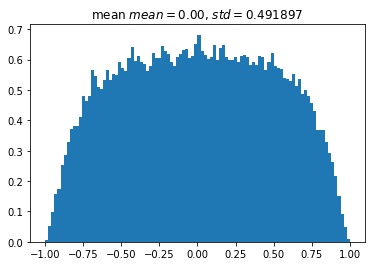

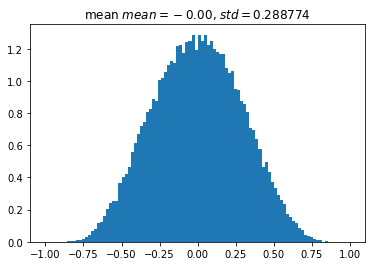

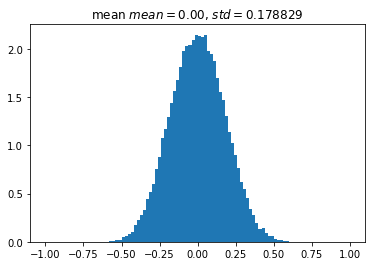

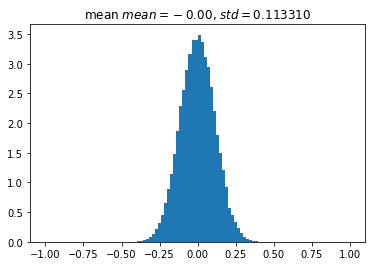

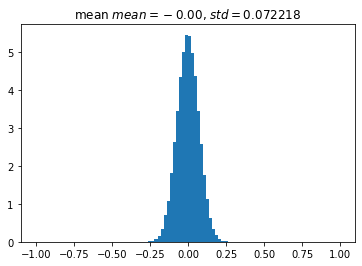

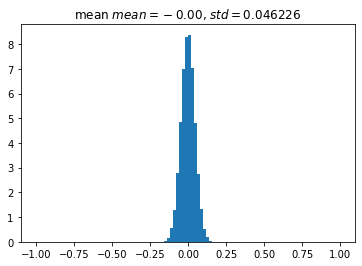

In [127]:
import matplotlib.pyplot as plt

num_bins = 100

#ax.scatter(x[:], x[1:])
#plt.show()
# #
for i in range(6):
    fig = "fig" + str(i)
    ax = "ax" + str(i)
    fig, ax = plt.subplots()
    x = hs[i].reshape(16 * 4096,)
    n, bins, patches = ax.hist(x, num_bins, density=True, range=[-1, 1])
    ax.set_title(r'mean $mean=%.2f$, $std=%f$' %(x.mean(), x.std()))
    #print(x.mean(), x.var(), x.std())
    # add a 'best fit' line
#y = ((1 / (np.sqrt(2 * np.pi) * s)) *
#     np.exp(-0.5 * (1 / s * (bins - mu) )**2))
#y = bins
#ax.plot(bins, y, '--')
#fig.tight_layout()
plt.show()

## Xavier
+ by divide the $\sqrt{Din}$, to make std (variance) same
    
    $\begin{aligned}
    Var(xw)=Var(\sum_i^n x_i w_i) \\= \sum_i^n E(x_i^2)E(w_i)^2-E(x_i)^2E(w_i)^2\\=\sum_i^n Var(x_i)Var(w_i)\\=(nVar(w))Var(x)
    \end{aligned}$
    
    which supposed $x_i$ and $w_i$ are independent, and all 0 mean.
    
    therefore, the std should be $\sqrt{n} \times std$

In [124]:
dims_xav = [4096] * 7
hs_xav = []

x_xav = np.random.randn(16, dims_xav[0]) # N * D = 16 * 4096
for Din, Dout in zip(dims_xav[: -1], dims_xav[1 :]):

    W_xav = np.random.randn(Din, Dout) / np.sqrt(Din)
    x_xav = np.tanh(x_xav.dot(W_xav))

    hs_xav.append(x_xav)

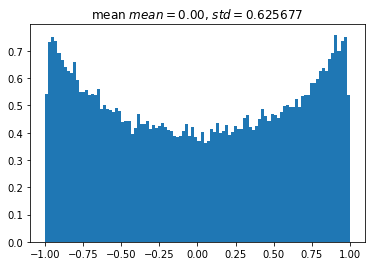

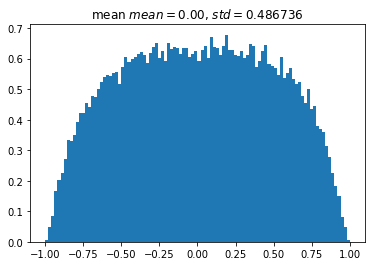

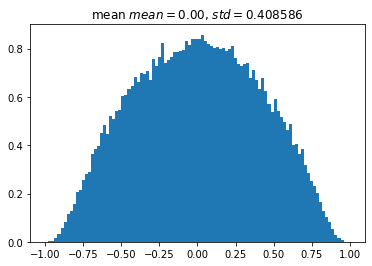

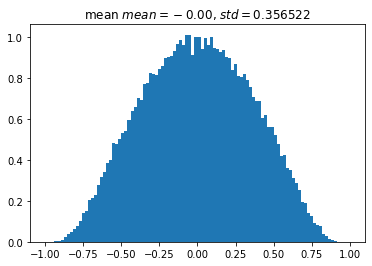

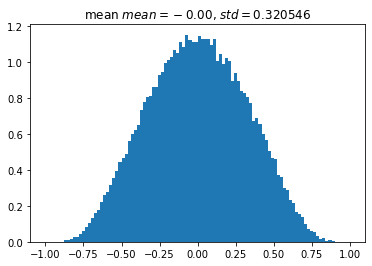

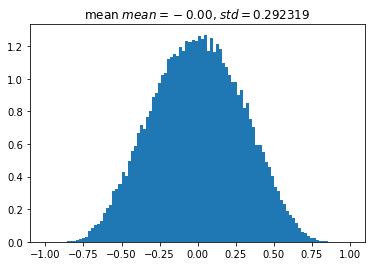

In [126]:
for i in range(6):
    fig = "fig" + str(i)
    ax = "ax" + str(i)
    fig, ax = plt.subplots()
    x_xav = hs_xav[i].reshape(16 * 4096,)
    n, bins, patches = ax.hist(x_xav, num_bins, density=True, range=[-1, 1])
    ax.set_title(r'mean $mean=%.2f$, $std=%f$' %(x_xav.mean(), x_xav.std()))

plt.show()

## ReLU situation
+ multiplied by factor $*\sqrt{\frac{2}{Din}}$
    keeps std (or variance) same, tends to 1

In [115]:
dims_relu = [4096] * 7
hs_relu = []

x_relu = np.random.randn(16, dims_relu[0]) # N * D = 16 * 4096
for Din, Dout in zip(dims_relu[: -1], dims_relu[1 :]):

    W_relu = np.random.randn(Din, Dout) * np.sqrt(2 / Din)
    x_relu = np.maximum(0, x_relu.dot(W_relu))

    hs_relu.append(x_relu)

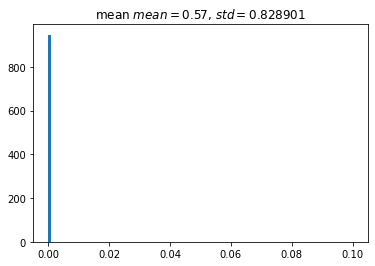

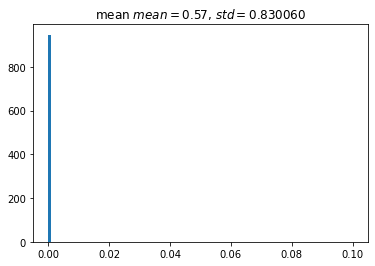

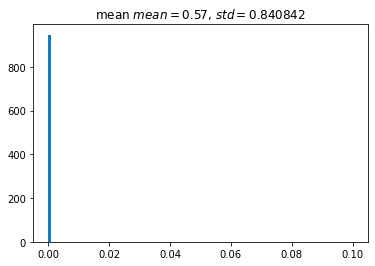

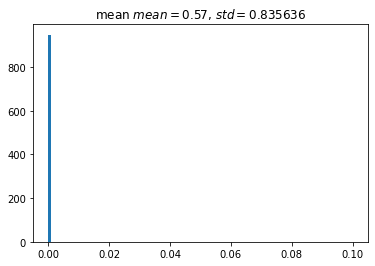

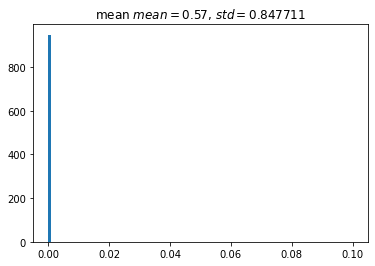

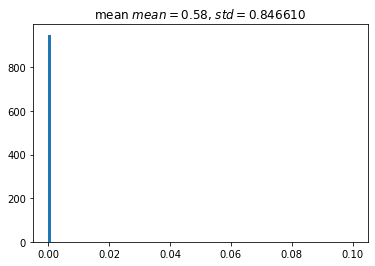

In [123]:
num_bins = 100


for i in range(6):
    fig_relu = "fig" + str(i)
    ax_relu = "ax" + str(i)
    fig_relu, ax_relu = plt.subplots()
    x_relu = hs_relu[i].reshape(16 * 4096,)
    n_relu, bins_relu, patches_relu = ax_relu.hist(x_relu, num_bins, density=True, range=[0, 0.1])
    ax_relu.set_title(r'mean $mean=%.2f$, $std=%f$' %(x_relu.mean(), x_relu.std()))
plt.show()